In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Loading of data

In [410]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [411]:
df.shape

(7043, 21)

In [412]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges is string value, whereas it should be float64, there is something wrong

In [414]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
col = ['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for c in col:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in customerID =  0
? in customerID =  0
- in customerID =  0
 ? in customerID =  0
 - in customerID =  0
?  in customerID =  0
-  in customerID =  0
 ?  in customerID =  0
 -  in customerID =  0
NA in customerID =  0
N/A in customerID =  0
 NA in customerID =  0
 N/A in customerID =  0
  in gender =  0
? in gender =  0
- in gender =  0
 ? in gender =  0
 - in gender =  0
?  in gender =  0
-  in gender =  0
 ?  in gender =  0
 -  in gender =  0
NA in gender =  0
N/A in gender =  0
 NA in gender =  0
 N/A in gender =  0
  in SeniorCitizen =  0
? in SeniorCitizen =  0
- in SeniorCitizen =  0
 ? in SeniorCitizen =  0
 - in SeniorCitizen =  0
?  in SeniorCitizen =  0
-  in SeniorCitizen =  0
 ?  in SeniorCitizen =  0
 -  in SeniorCitizen =  0
NA in SeniorCitizen =  0
N/A in SeniorCitizen =  0
 NA in SeniorCitizen =  0
 N/A in SeniorCitizen =  0
  in Partner =  0
? in Partner =  0
- in Partner =  0
 ? in Partner =  0
 - in Partner =  0
?  in Partner =  0
-  in Partner =  0
 ?  in Partner =

TotalCharges has blank spaces Qty -11

In [415]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges']=df['TotalCharges'].astype(float)

replaced the " " value with Null value

In [416]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [418]:
df2=df[df['TotalCharges'].isnull()]

In [419]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [420]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2)
df[['TotalCharges']]=imp.fit_transform(df[['TotalCharges']])

In [421]:
df.drop('customerID',inplace=True,axis=1)

# EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

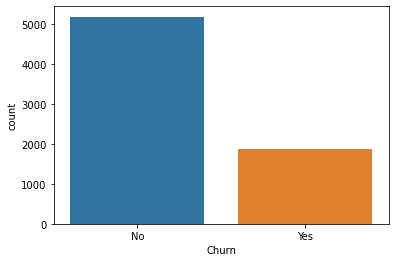

In [422]:
sns.countplot(df['Churn'])

There is class imbalance in  Target

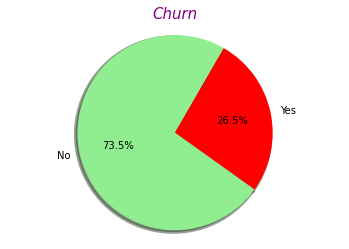

In [423]:
plt.pie(x=df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Churn',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


So 26.5 % are willing for churning

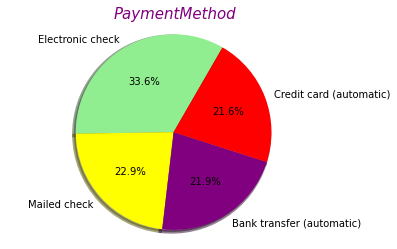

In [456]:
plt.pie(x=df['PaymentMethod'].value_counts(),labels=df['PaymentMethod'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('PaymentMethod',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


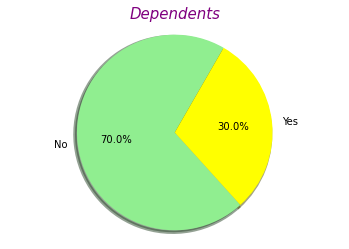

In [457]:
plt.pie(x=df['Dependents'].value_counts(),labels=df['Dependents'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Dependents',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


<AxesSubplot:xlabel='Churn', ylabel='count'>

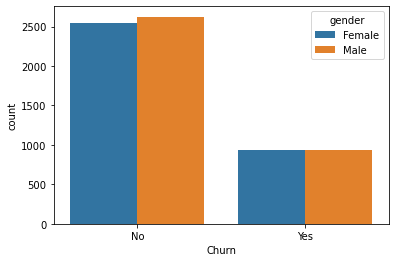

In [424]:
sns.countplot(x='Churn',hue='gender',data=df)

Gender is not playing important role in Churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

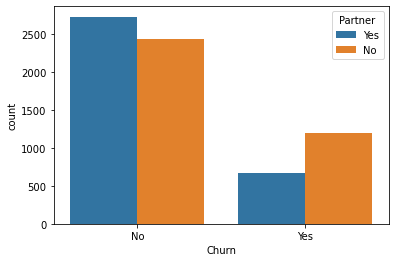

In [425]:
sns.countplot(x='Churn',hue='Partner',data=df)

Partner is also not playing important role for Churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

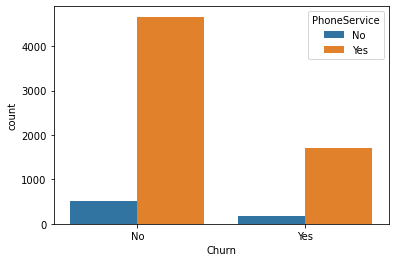

In [426]:
sns.countplot(x='Churn',hue='PhoneService',data=df)

Those have phone service , max of are not willing for churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

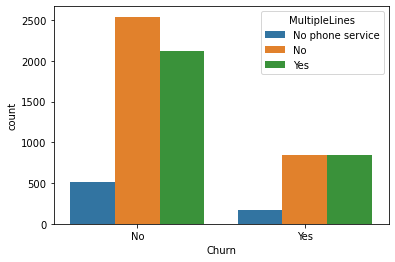

In [427]:
sns.countplot(x='Churn',hue='MultipleLines',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

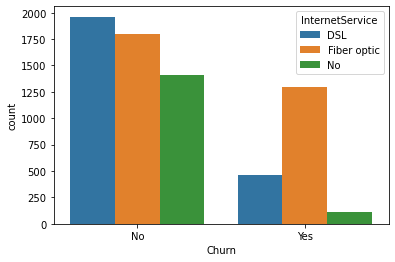

In [428]:
sns.countplot(x='Churn',hue='InternetService',data=df)

Customers with fibre optic internet Service more likely to choose 
for churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

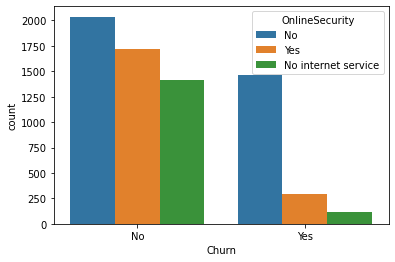

In [429]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

There is higher rate of churning for customers with no Online Security

<AxesSubplot:xlabel='Churn', ylabel='count'>

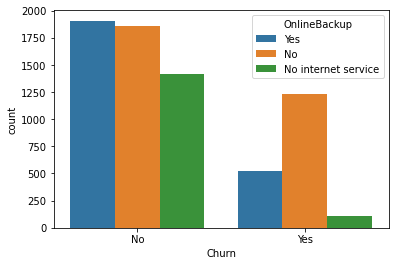

In [430]:
sns.countplot(x='Churn',hue='OnlineBackup',data=df)

Customer dont have online backup facility has got higher number of 
churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

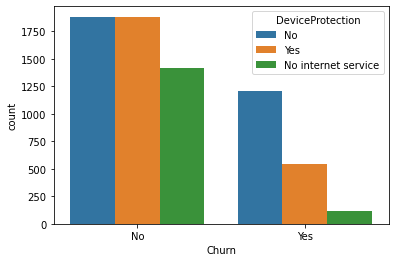

In [431]:
sns.countplot(x='Churn',hue='DeviceProtection',data=df)

Customer with Device protection facility more likely to stay

<AxesSubplot:xlabel='Churn', ylabel='count'>

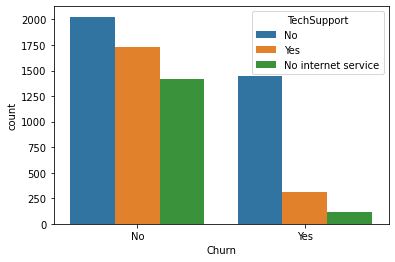

In [432]:
sns.countplot(x='Churn',hue='TechSupport',data=df)

Customers without techsupport are happy with service, churning count is less 

<AxesSubplot:xlabel='Churn', ylabel='count'>

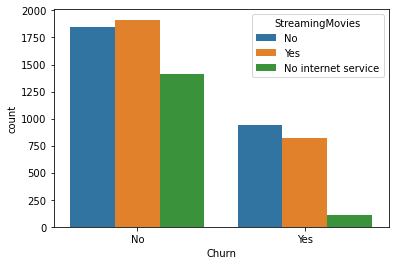

In [433]:
sns.countplot(x='Churn',hue='StreamingMovies',data=df)

Streaming movies doest not playing any important role in churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

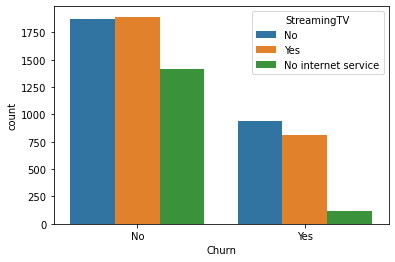

In [434]:
sns.countplot(x='Churn',hue='StreamingTV',data=df)

Streaming TV is also not playing important role for churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

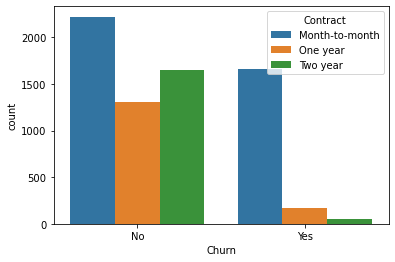

In [435]:
sns.countplot(x='Churn',hue='Contract',data=df)

(i) Customers with Month to month contract has higher rate of churning

(ii) Whereas with 1 or 2 years of contract customers are 
sustaining more

<AxesSubplot:xlabel='Churn', ylabel='count'>

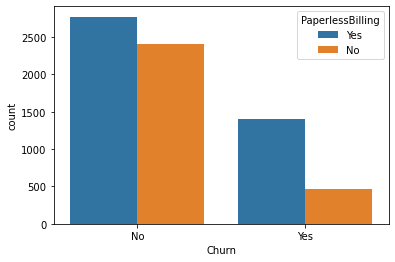

In [436]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)

Customer with paperless billing facility has higher 
count of churning

<AxesSubplot:xlabel='Churn', ylabel='count'>

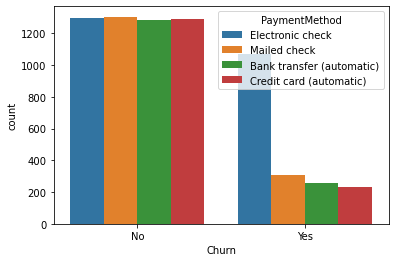

In [437]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

(i) Customer who pays using Electronic check is likely 
to churn much more than other payment method.

(ii) Automatic payment is more preferred

No handles with labels found to put in legend.


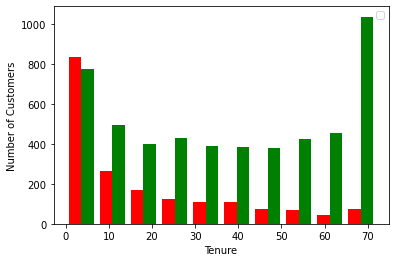

In [438]:
tenure_no=df[df.Churn=='No'].tenure
tenure_yes=df[df.Churn=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.hist([tenure_yes,tenure_no],color=['red','green'])
plt.legend()

(i) We can see less than 10 months tenure has more number of "Yes" for churn

(ii) With more than 60 months of tenure has highest "No" for churn

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


No handles with labels found to put in legend.


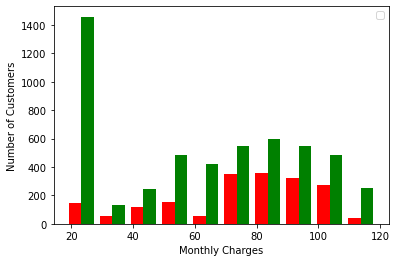

In [310]:
tenure_no=df[df.Churn=='No'].MonthlyCharges
tenure_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.hist([tenure_yes,tenure_no],color=['red','green'])
plt.legend()

(i) Monthly charges with in 60-100 has more chances of churning

(ii) Monthly charges less than 60 has less chace of churning

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

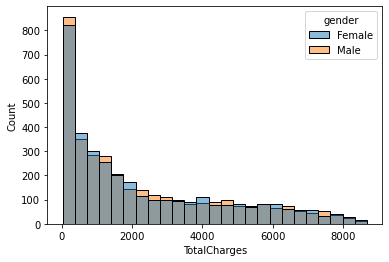

In [444]:
sns.histplot(x='TotalCharges',hue='gender',data=df)

Female Customers are more responsible for the Total Charges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

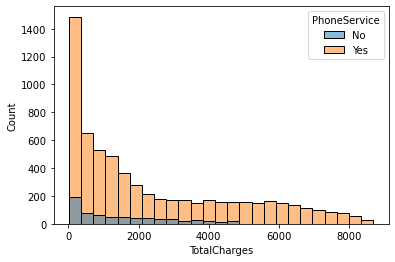

In [445]:
sns.histplot(x='TotalCharges',hue='PhoneService',data=df)

Total Charges is dependent on PhoneServices

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

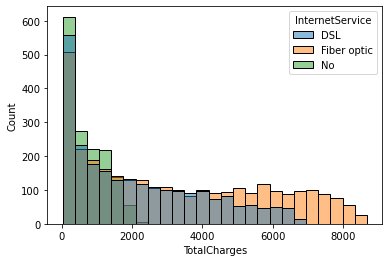

In [446]:
sns.histplot(x='TotalCharges',hue='InternetService',data=df)

(i) Fibre Optic is expensive

(ii) Without Internet Service the charges is less

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

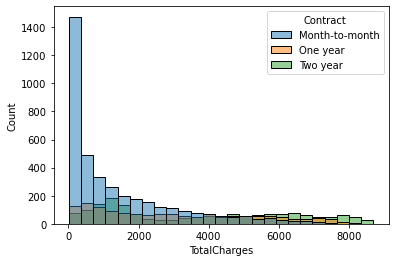

In [447]:
sns.histplot(x='TotalCharges',hue='Contract',data=df)

Month-to-month contribute more in total charges

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

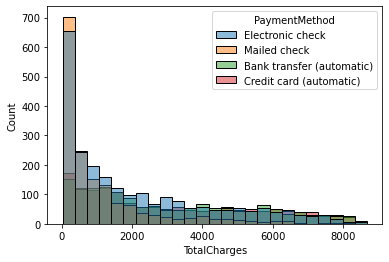

In [452]:
sns.histplot(x='TotalCharges',hue='PaymentMethod',data=df)

Electronic check are more in paying the total charges

In [ ]:
df.describe()

# Removing Outliers

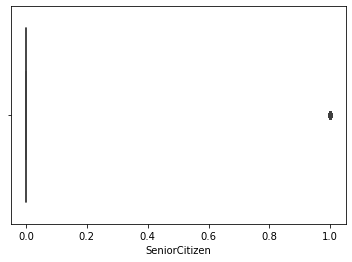

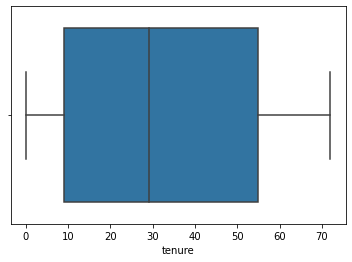

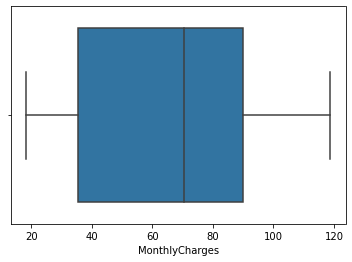

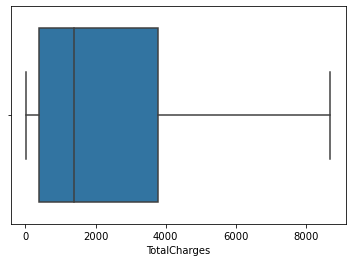

In [311]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i])
        plt.show()

There is nor outliers in numerical data

# Removing Skewness

In [312]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

There is little skewness in TotalCharges

In [313]:
df3=np.sqrt(df[['TotalCharges']])
df3.index=df.index
df['TotalCharges']=df3[['TotalCharges']]

In [314]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.307849
dtype: float64

# Feature Engineering

In [315]:
# printing columns & unique values of categorical data
for column in df:
    #print(column)
    if df[column].dtypes=='object':
        print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [316]:
# replacing the No service with No value
df['MultipleLines']=df['MultipleLines'].replace("No phone service","No")

In [317]:
# replacing the No service with No value

df['OnlineSecurity']=df['OnlineSecurity'].replace("No internet service","No")

In [318]:
# replacing the No service with No value
df['OnlineBackup']=df['OnlineBackup'].replace("No internet service","No")

In [319]:
# replacing the No service with No value
df['DeviceProtection']=df['DeviceProtection'].replace("No internet service","No")

In [320]:
# replacing the No service with No value
df['TechSupport']=df['TechSupport'].replace("No internet service","No")

In [321]:
# replacing the No service with No value
df['StreamingTV']=df['StreamingTV'].replace("No internet service","No")

In [322]:
# replacing the No service with No value
df['StreamingMovies']=df['StreamingMovies'].replace("No internet service","No")

In [323]:
#checking after replacement
for column in df:
    #print(column)
    if df[column].dtypes=='object':
        print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [324]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [325]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [326]:
# replacing the contract as 0,1,2 as it is ordinal data
df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [328]:
dumm=pd.get_dummies(df[['InternetService','PaymentMethod']])

In [329]:
df=df.join(dumm)

In [330]:
df.drop(columns=['InternetService','PaymentMethod'],inplace=True)

# Correlation 

<AxesSubplot:>

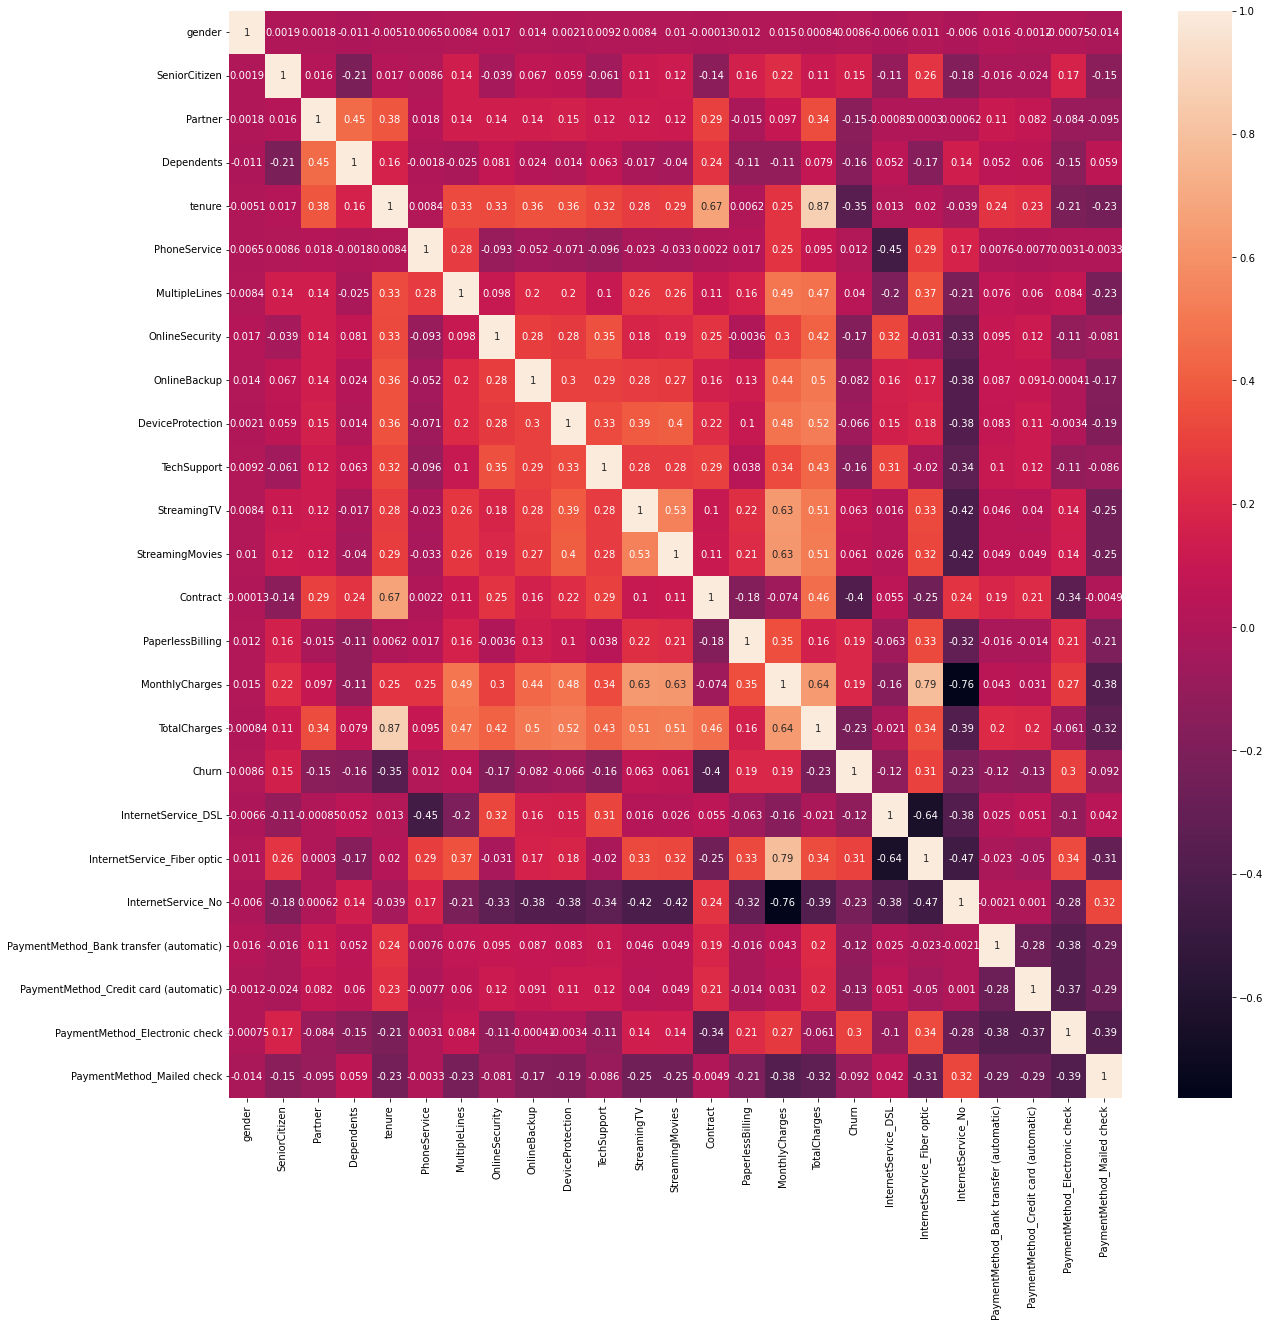

In [331]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

(i) tenure is highly correalted eith Contract and TotalChages

(ii) Montly charges are positively correalted with fibre optic internet

(iii) Streaming TV and Streaming Movies also correlated with Monthly charges

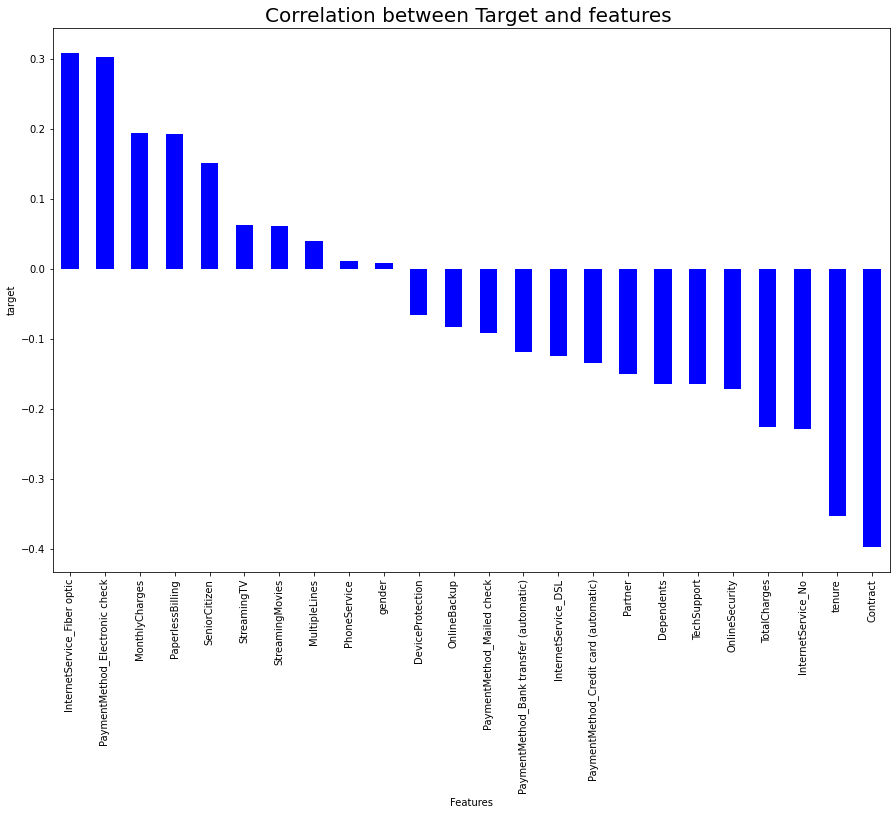

In [332]:
# generationg corraltion bar graph
plt.figure(figsize=(15,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

Positively correlated Features

(i) InternetService_fibre _optic

(ii) PaymentMethod_electronic check

(iii) Monthly Charges 

(iv) PaperlessBilling

Negatively Correlated Features

(i) Contract

(ii) Tenure

(iii) No Internet Service

(iv) Total Charges

(v) OnlineSecurity

(vi) Tech Support

(vii) Dependents

# Scaling of Features

In [333]:
from sklearn.preprocessing import minmax_scale

df[['tenure','MonthlyCharges','TotalCharges']] = minmax_scale(df[['tenure','MonthlyCharges','TotalCharges']])

scaled the numerical columns

# Separating of Features and Target

In [389]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# MultiCollinearity

In [390]:
# checking the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.001989,gender
1,1.153213,SeniorCitizen
2,1.464268,Partner
3,1.384053,Dependents
4,14.228518,tenure
5,34.860655,PhoneService
6,7.278169,MultipleLines
7,6.341394,OnlineSecurity
8,6.779112,OnlineBackup
9,6.930569,DeviceProtection


# Priciple Component Analysis

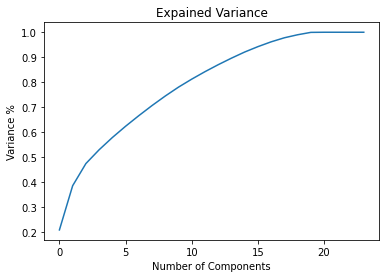

In [391]:
# determining the number of features required for best accuarcy
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

18 Columns are sufficient for 98% accuracy

# Selecting K Best Features

In [392]:
from sklearn.feature_selection import SelectKBest, f_classif

In [393]:
bestfeat=SelectKBest(score_func=f_classif,k=17)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(30,'Score'))

                                    Feature        Score
13                                 Contract  1315.088872
4                                    tenure   997.268010
18              InternetService_Fiber optic   738.046042
22           PaymentMethod_Electronic check   706.195028
19                       InternetService_No   385.698588
16                             TotalCharges   376.766118
15                           MonthlyCharges   273.463704
14                         PaperlessBilling   268.985218
7                            OnlineSecurity   212.666199
10                              TechSupport   196.255405
3                                Dependents   195.149314
1                             SeniorCitizen   164.041424
2                                   Partner   163.060036
21    PaymentMethod_Credit card (automatic)   129.330975
17                      InternetService_DSL   110.338532
20  PaymentMethod_Bank transfer (automatic)    99.315060
23               PaymentMethod_

In [394]:
#x.drop(['PhoneService','gender'],inplace=True,axis=1)

# Class Imbalance

In [395]:
# solving the class imbalance problem
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Best Random State for Model Building

In [396]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)


Best Accuracy is 0.8515655199072284  on Random state 71


In [397]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [403]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=71)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [404]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [405]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.8140703517587939
[[1031  266]
 [ 215 1075]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1297
           1       0.80      0.83      0.82      1290

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

----------------------------------------
DecisionTreeClassifier()
0.7792810204870506
[[1008  289]
 [ 282 1008]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1297
           1       0.78      0.78      0.78      1290

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

----------------------------------------
RandomForestClassifier()
0.8573637417858523
[[1077  220]
 [ 149 1141]]
              precision    recall  f1-score   support



# Cross Validation

In [406]:
#checking the cross validation score
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.7939740778877518
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.7645979410810142
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.839297287074201
----------------------------------------
Mean Accuracy of  GaussianNB()
0.7718424032707345
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.801025957135819
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.7918470263820885
----------------------------------------


# RUC_AUC Score

AUC Score of  LogisticRegression()
0.7991835182614249




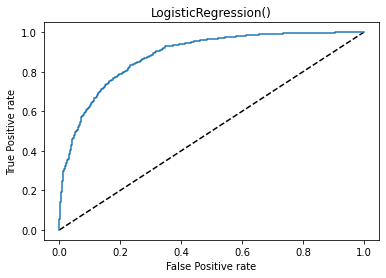

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.9408002908148195




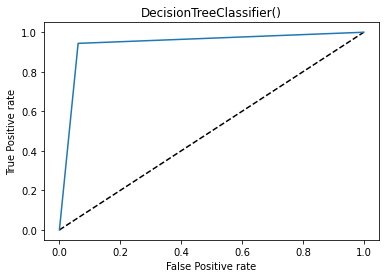

----------------------------------------
AUC Score of  RandomForestClassifier()
0.9650516997480482




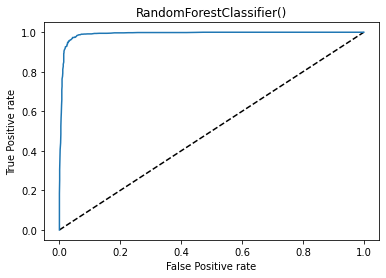

----------------------------------------
AUC Score of  GaussianNB()
0.7776901865543586




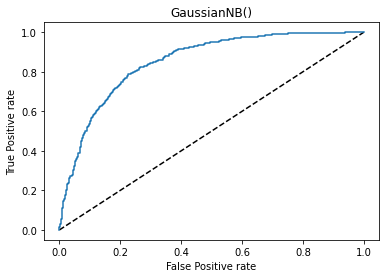

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.8428819724706464




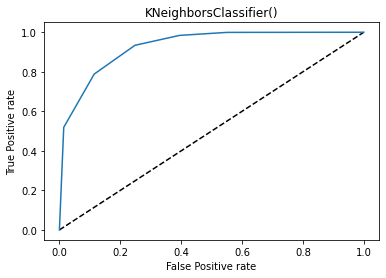

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.800041792672471




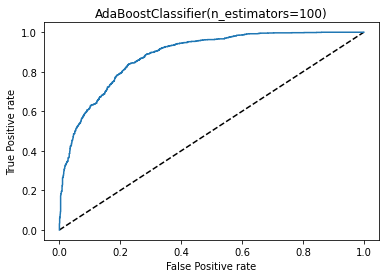

----------------------------------------


In [407]:
# checkinga 
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

After comparing all the model we found RandomForestClassifier is
the best model 

# Hyper Parameter Tuning

In [462]:
#setting the parameters for best tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[80,100,200,300],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5]}


In [463]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

Found the best parameters for the model training

In [461]:
#Finding the accuracy with best parameters
final_mod=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_split=4,n_estimators=200)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.84731349052957


Final model found with 84 % accuracy

# Saving the model

In [464]:
#saving the model for future use
import joblib
joblib.dump(final_mod,'Cencus_Income.obj')

['Cencus_Income.obj']

Saved the model for future implementation 